# Projeto Final - Coleta e Organização de Dados SRAG

**Integrantes do Grupo:**
* Virginia Prettz Camara Canto
* Pedro Medeiros
* Vinicius Henrique Barbosa de Oliveira

**Subproblema Escolhido:** Predição de Óbito e Fatores de Risco em Pacientes com SRAG.

**Base Utilizada:** 2013 a 2018 (OpenDataSUS).

**Objetivo:** Preparar a base de dados do SRAG (2013-2018) para, futuramente, treinar um modelo capaz de prever o desfecho (Cura ou Óbito) com base em sintomas e comorbidades.

---
### 1. Coleta e Unificação dos Dados
Nesta etapa, realizamos a leitura dos arquivos CSV anuais (2013 a 2018), tratando as especificidades do encoding (`latin1`) e separadores (`ponto e vírgula`) utilizados pelo DataSUS.

In [1]:
import pandas as pd

caminho_base = 'content/'

arquivos = [
    'content/INFLUD13.csv',
    'content/INFLUD14.csv',
    'content/INFLUD15.csv',
    'content/INFLUD16.csv',
    'content/INFLUD17.csv',
    'content/INFLUD18.csv',
]


lista_dfs = []
print("Carregando as bases...")

for arq in arquivos:
    try:
        df_temp = pd.read_csv(arq, sep=';', encoding='latin1', low_memory=False)
        lista_dfs.append(df_temp)
        print(f"Arquivo {arq} carregado!")
    except Exception as e:
        print(f"Arquivo NÃO foi carregado corretamente! {arq}: {e}")

if lista_dfs:
    df_srag = pd.concat(lista_dfs, ignore_index=True)
    print("\nSucesso! Todas as bases foram unificadas.")
else:
    print("\nNenhum arquivo foi carregado. Verifique os nomes.")


Carregando as bases...
Arquivo content/INFLUD13.csv carregado!
Arquivo content/INFLUD14.csv carregado!
Arquivo content/INFLUD15.csv carregado!
Arquivo content/INFLUD16.csv carregado!
Arquivo content/INFLUD17.csv carregado!
Arquivo content/INFLUD18.csv carregado!

Sucesso! Todas as bases foram unificadas.


### 2. Seleção de Variáveis Relevantes
Devido à alta dimensionalidade da base original (+100 colunas), filtramos apenas as variáveis pertinentes ao subproblema de predição de óbito.
Selecionamos 4 grupos de variáveis:
1.  **Demográficas:** Idade, Sexo, UF.
2.  **Sintomas:** Febre, Tosse, Dispneia, Saturação, etc.
3.  **Comorbidades:** Cardiopatia, Pneumopatia, Renal, etc.
4.  **Alvo (Target):** Evolução (Desfecho do caso).

In [2]:
colunas_interesse = [
    'NU_ANO', 'DT_NOTIFIC', 'SG_UF_NOT',          # Tempo e Local
    'CS_SEXO', 'NU_IDADE_N',                      # Perfil
    'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA',     # Sintomas Respiratorios
    'SATURACAO', 'DIARREIA', 'VOMITO',            # Outros sintomas
    'CARDIOPATI', 'PNEUMOPATI', 'RENAL',          # Comorbidades
    'METABOLICA', 'IMUNODEPRE', 'OBESIDADE',      # Outras comorbidades
    'UTI', 'SUPORT_VEN',                          # Gravidade
    'EVOLUCAO'                                    # Alvo
]

cols_existentes = [c for c in colunas_interesse if c in df_srag.columns]

df_final = df_srag[cols_existentes].copy()

print(f"Colunas selecionadas: {len(cols_existentes)}")
display(df_final.head())

print("\n 1. Verificando Valores Nulos ")

nulos = (df_final.isnull().sum() / len(df_final)) * 100
print(nulos.sort_values(ascending=False))

print("\n 2. Verificando Tipos de Dados ")
print(df_final.dtypes)

print("\n 3. Checando a coluna Alvo (EVOLUCAO) ")
print(df_final['EVOLUCAO'].value_counts(dropna=False))

Colunas selecionadas: 20


,NU_ANO,DT_NOTIFIC,SG_UF_NOT,CS_SEXO,NU_IDADE_N,FEBRE,TOSSE,GARGANTA,DISPNEIA,SATURACAO,DIARREIA,CARDIOPATI,PNEUMOPATI,RENAL,METABOLICA,IMUNODEPRE,OBESIDADE,UTI,SUPORT_VEN,EVOLUCAO
0,2013,04/02/2013,11,M,4026,1.0,NaN,NaN,NaN,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
1,2013,08/04/2013,11,F,4030,1.0,1.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
2,2013,30/03/2013,11,F,4057,2.0,2.0,2.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
3,2013,26/03/2013,11,M,4001,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,9.0
4,2013,11/03/2013,11,M,4001,1.0,1.0,NaN,1.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,1.0



 1. Verificando Valores Nulos 
DIARREIA      100.000000
EVOLUCAO        6.244828
OBESIDADE       4.028266
METABOLICA      3.491098
RENAL           3.254724
IMUNODEPRE      3.235893
CARDIOPATI      3.045605
SATURACAO       2.990104
PNEUMOPATI      2.988122
GARGANTA        2.672957
UTI             2.419239
SUPORT_VEN      2.062944
DISPNEIA        0.933107
FEBRE           0.667991
TOSSE           0.518833
NU_ANO          0.000000
CS_SEXO         0.000000
SG_UF_NOT       0.000000
DT_NOTIFIC      0.000000
NU_IDADE_N      0.000000
dtype: float64

 2. Verificando Tipos de Dados 
NU_ANO          int64
DT_NOTIFIC     object
SG_UF_NOT       int64
CS_SEXO        object
NU_IDADE_N      int64
FEBRE         float64
TOSSE         float64
GARGANTA      float64
DISPNEIA      float64
SATURACAO     float64
DIARREIA      float64
CARDIOPATI    float64
PNEUMOPATI    float64
RENAL         float64
METABOLICA    float64
IMUNODEPRE    float64
OBESIDADE     float64
UTI           float64
SUPORT_VEN    float64
EV

### 3. Identificação de Problemas nos Dados (Data Quality)
Realizamos uma inspeção inicial para identificar inconsistências, valores nulos e formatos inadequados. Os principais problemas encontrados foram:

* **Valores Ausentes Críticos:** A variável `DIARREIA` apresentou 100% de valores nulos no período analisado.
* **Inconsistência de Formato (Idade):** A coluna `NU_IDADE_N` segue o padrão DataSUS (Ex: 4026 = 26 anos), necessitando decodificação.
* **Sujeira no Alvo:** A coluna `EVOLUCAO` contém registros "Ignorados" (9) ou vazios, que inviabilizam o aprendizado supervisionado.

In [3]:
print(" Porcentagem de Valores Nulos ")
print((df_final.isnull().sum() / len(df_final) * 100).sort_values(ascending=False).head(10))

print("\n Exemplo de Formato de Idade (Original) ")
print(df_final['NU_IDADE_N'].head(3).tolist())

print("\n Distribuição do alvo (Evolucao) ")
print(df_final['EVOLUCAO'].value_counts(dropna=False))

 Porcentagem de Valores Nulos 
DIARREIA      100.000000
EVOLUCAO        6.244828
OBESIDADE       4.028266
METABOLICA      3.491098
RENAL           3.254724
IMUNODEPRE      3.235893
CARDIOPATI      3.045605
SATURACAO       2.990104
PNEUMOPATI      2.988122
GARGANTA        2.672957
dtype: float64

 Exemplo de Formato de Idade (Original) 
[4026, 4030, 4057]

 Distribuição do alvo (Evolucao) 
EVOLUCAO
1.0    159794
2.0     25519
NaN     12602
9.0      3884
Name: count, dtype: int64


### 4. Tratamento e Limpeza (Data Cleaning)
Para sanar os problemas identificados, aplicamos as seguintes transformações:
1.  **Remoção** da coluna `DIARREIA`.
2.  **Conversão da Idade:** Criamos a função `tratar_idade` para converter o formato codificado em idade numérica real (anos).
3.  **Limpeza do Alvo:** Filtramos a base para manter apenas casos com desfecho definido: Cura (1) ou Óbito (2). Criamos a coluna binária `DEATH` (0=Cura, 1=Óbito).

In [4]:
df_limpo = df_final.copy()

if 'DIARREIA' in df_limpo.columns:
    df_limpo = df_limpo.drop(columns=['DIARREIA'])
    print("Coluna DIARREIA removida (estava vazia).")

def tratar_idade(valor):
    valor_str = str(valor)
    if valor_str.startswith('4'):
        return int(valor_str[1:])
    elif valor_str.startswith('3') or valor_str.startswith('2'):
        return 0
    else:
        return None


df_limpo['IDADE_REAL'] = df_limpo['NU_IDADE_N'].apply(tratar_idade)

df_limpo = df_limpo.drop(columns=['NU_IDADE_N'])



df_limpo = df_limpo[df_limpo['EVOLUCAO'].isin([1.0, 2.0])]

df_limpo['OBITO'] = df_limpo['EVOLUCAO'].apply(lambda x: 1 if x == 2.0 else 0)

print("\nSTATUS PÓS-LIMPEZA:")
print(f"Tamanho original: {df_final.shape}")
print(f"Tamanho atual: {df_limpo.shape}")
print("\nDistribuição de Óbitos e Curas:")
print(df_limpo['OBITO'].value_counts())

print("\nExemplo das idades tratadas:")
display(df_limpo[['IDADE_REAL', 'OBITO']].head())

Coluna DIARREIA removida (estava vazia).

STATUS PÓS-LIMPEZA:
Tamanho original: (201799, 20)
Tamanho atual: (185313, 20)

Distribuição de Óbitos e Curas:
OBITO
0    159794
1     25519
Name: count, dtype: int64

Exemplo das idades tratadas:


,IDADE_REAL,OBITO
0,26.0,0
1,30.0,0
2,57.0,1
4,1.0,0
5,2.0,0


### 5. Análise Exploratória Inicial
Para validar a consistência dos dados tratados, visualizamos a distribuição de idade separada pelo desfecho. O gráfico abaixo confirma a hipótese de que a idade avançada é um fator de risco relevante para o óbito em casos de SRAG.

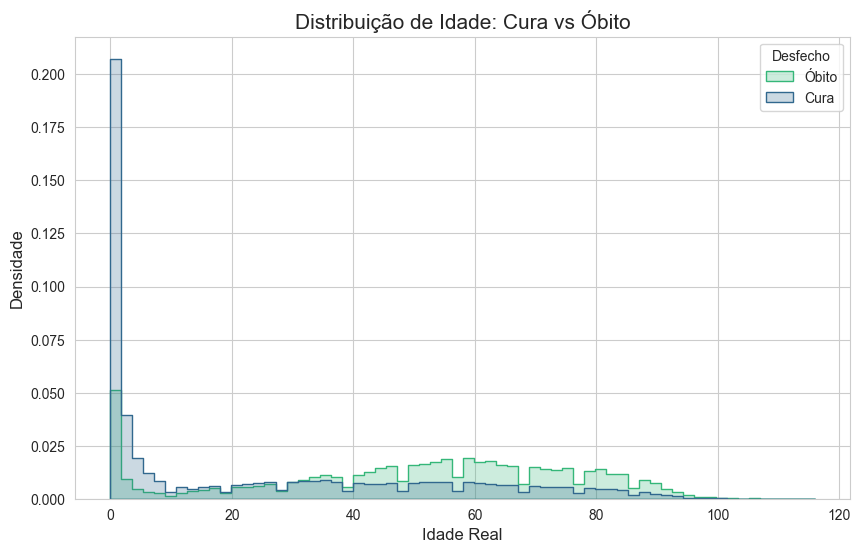

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(data=df_limpo, x='IDADE_REAL', hue='OBITO', element="step", stat="density", common_norm=False, palette='viridis')

plt.title('Distribuição de Idade: Cura vs Óbito', fontsize=15)
plt.xlabel('Idade Real', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(title='Desfecho', labels=['Óbito', 'Cura'])
plt.show()

### 6 Pré-processamento e Codificação das Features`
Para preparar os dados foi necessário garantir que todas as variáveis preditoras sejam numéricas e estejam no formato binário (0 ou 1) onde aplicável.

* DT_NOTIFIC (Data): Por ser uma variável de data e necessitar de um tratamento mais complexo (como conversão para dias, semanas, etc.) para ser útil, e por questões de simplificação inicial do modelo, esta coluna foi removida.

* CS_SEXO (Gênero): Esta é uma variável categórica nominal (M/F). Ela foi convertida para o formato numérico binário usando One-Hot Encoding (ou variáveis dummy). Uma nova coluna foi criada (ex: CS_SEXO_M), onde 'true' representa o gênero Masculino e 'false' o Feminino.

* As colunas de sintomas e comorbidades (como FEBRE, CARDIOPATI, etc.) utilizaram um código de valores na qual foi necessário ser padronizado para a classificação binária:
  1.  1,0 -> 1, na qual significa que o paciente tem comorbidade
  2.  2,0 -> 0, na qual significa que o paciente não tem comorbidade
  3. Nan -> 0, na qual significa que o campo foi deixado vazio, ausente, ignorado ou não preenchido na ficha de notificação.



In [6]:


colunas_dicotomicas = [
    'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'SATURACAO',
    'CARDIOPATI', 'PNEUMOPATI', 'RENAL', 'METABOLICA',
    'IMUNODEPRE', 'OBESIDADE', 'UTI', 'SUPORT_VEN'
]

for col in colunas_dicotomicas:

    df_limpo[col] = df_limpo[col].replace(2.0, 0)


df_limpo[colunas_dicotomicas] = df_limpo[colunas_dicotomicas].fillna(0)



if 'CS_SEXO' in df_limpo.columns:
    df_limpo = pd.get_dummies(df_limpo, columns=['CS_SEXO'], drop_first=True)
    print("CS_SEXO codificada para CS_SEXO_M.")
else:
    print("CS_SEXO já foi processada.")



colunas_a_remover = ['EVOLUCAO', 'DT_NOTIFIC', 'SG_UF_NOT', 'NU_ANO']
df_limpo = df_limpo.drop(columns=colunas_a_remover, errors='ignore')

print("\nSTATUS PÓS-PRÉ-PROCESSAMENTO:")
print("Colunas restantes:", df_limpo.columns.tolist())
display(df_limpo.head())

CS_SEXO codificada para CS_SEXO_M.

STATUS PÓS-PRÉ-PROCESSAMENTO:
Colunas restantes: ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'SATURACAO', 'CARDIOPATI', 'PNEUMOPATI', 'RENAL', 'METABOLICA', 'IMUNODEPRE', 'OBESIDADE', 'UTI', 'SUPORT_VEN', 'IDADE_REAL', 'OBITO', 'CS_SEXO_I', 'CS_SEXO_M']


,FEBRE,TOSSE,GARGANTA,DISPNEIA,SATURACAO,CARDIOPATI,PNEUMOPATI,RENAL,METABOLICA,IMUNODEPRE,OBESIDADE,UTI,SUPORT_VEN,IDADE_REAL,OBITO,CS_SEXO_I,CS_SEXO_M
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,0,False,True
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,0,False,False
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,57.0,1,False,False
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,False,True
5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0,False,True


###7. Definição de X e Y




In [7]:

y = df_limpo['OBITO']

X = df_limpo.drop(columns=['OBITO'])

print("Formato de X (Features):", X.shape)
print("Formato de y (Alvo):", y.shape)

Formato de X (Features): (185313, 16)
Formato de y (Alvo): (185313,)


### 8. Imputar a idade
  Como a idade é a variável mais importante para a predição de óbito , precisamos preencher os NaNs de idade com a  mediana, pois ela é menos sensível a outliers.


In [8]:
mediana_idade = df_limpo['IDADE_REAL'].median()


df_limpo['IDADE_REAL'] = df_limpo['IDADE_REAL'].fillna(mediana_idade)


X_check = df_limpo.drop(columns=['OBITO'], errors='ignore')
print("Total de NaN após a imputação da idade:", X_check.isna().sum().sum())

if X_check.isna().sum().sum() == 0:
    print("\nSUCESSO! Não há mais valores NaN nas features.")
else:
    print("\nAinda há NaNs. Verifique outras colunas.")

Total de NaN após a imputação da idade: 0

SUCESSO! Não há mais valores NaN nas features.


### 9. Escolha do Modelo

Com base na análise apresentada no notebook, a escolha da Regressão Logística justifica-se principalmente por três motivos interligados, alinhados ao objetivo do projeto de saúde pública:



*   Natureza do Problema (Classificação Binária): O objetivo do projeto foi prever um desfecho com apenas duas possibilidades: Cura ou Óbito. A regressão logística é o modelo estatístico padrão e mais direto para problemas de classificação binária, onde se deseja calcular a probabilidade de um evento (neste caso, o óbito) ocorrer.
*   Interpretabilidade via Odds Ratios: Um dos focos centrais da análise não é apenas "acertar" quem vai falecer, mas entender quais são os fatores de risco e o quanto eles influenciam o resultado.
*   Necessidade de Probabilidades para Ajuste de Corte: A regressão logística retorna uma probabilidade (um valor contínuo entre 0 e 1) em vez de apenas uma classe seca.





In [9]:
X = df_limpo.drop(columns=['OBITO'])
y = df_limpo['OBITO']

print(f"X tem NaNs? {X.isnull().values.any()}")

X tem NaNs? False


### 10. Separação Treino/Teste (70/30)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print(f"--- Conferência da Divisão 70/30 ---")
print(f"Total de Linhas (Base Filtrada): {len(y)}")
print(f"Linhas para Treinamento (70%):   {len(y_train)}")
print(f"Linhas para Teste (30%):         {len(y_test)}")

print(f"\n--- Verificação de Proporção (Consistência) ---")
print(f"Taxa de Óbito na Base Original: {y.mean():.4f}")
print(f"Taxa de Óbito no Treino:        {y_train.mean():.4f}")
print(f"Taxa de Óbito no Teste:         {y_test.mean():.4f}")


--- Conferência da Divisão 70/30 ---
Total de Linhas (Base Filtrada): 185313
Linhas para Treinamento (70%):   129719
Linhas para Teste (30%):         55594

--- Verificação de Proporção (Consistência) ---
Taxa de Óbito na Base Original: 0.1377
Taxa de Óbito no Treino:        0.1377
Taxa de Óbito no Teste:         0.1377


###10.2 Separação da Base de Dados (Treino vs. Teste)
  Para garantir a validade estatística do modelo e evitar o overfitting, a base de dados processada (185.313 registos) foi dividida de forma randómica e estratificada:

  Conjunto de Treino (70%): 129.719 pacientes — utilizados para o ajuste dos coeficientes da Regressão Logística.

  Conjunto de Teste (30%): 55.594 pacientes — mantidos inéditos para a avaliação final de desempenho.

  Validação da Estratificação: A divisão utilizou o parâmetro stratify, assegurando que a proporção da variável alvo (Cura vs. Óbito) fosse preservada. A taxa de letalidade manteve-se constante em 13,77% tanto no conjunto de treino quanto no de teste. Isso confirma que os dados estão prontos para a modelagem, garantindo um teste justo e representativo da realidade, mesmo num cenário de classes desbalanceadas.
  

### 11. Pipeline de Modelagem (V1)
Esta etapa consolidou o pré-processamento e o treinamento em um fluxo único. Utilizamos a estrutura de Pipeline do Scikit-Learn para garantir que o escalonamento aplicado no treino seja exatamente o mesmo aplicado no teste (evitando vazamento de dados).

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pipeline_v1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
)

print("Treinando o modelo...")
pipeline_v1.fit(X_train, y_train)

Treinando o modelo...


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some 

### 12. Métricas de Desempenho (Accuracy, F1-Score, AUC-ROC)

In [12]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

y_pred = pipeline_v1.predict(X_test)

y_pred_proba = pipeline_v1.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')
auc_roc = roc_auc_score(y_test, y_pred_proba)

print("--- Métricas de Desempenho (Pipeline v1) ---")
print(f"Acurácia Geral: {accuracy:.4f}")
print(f"F1-Score (Óbito): {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nRelatório Completo de Classificação:")
print(classification_report(y_test, y_pred))

--- Métricas de Desempenho (Pipeline v1) ---
Acurácia Geral: 0.7456
F1-Score (Óbito): 0.4456
AUC-ROC: 0.8180

Relatório Completo de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.75      0.83     47938
           1       0.32      0.74      0.45      7656

    accuracy                           0.75     55594
   macro avg       0.63      0.74      0.64     55594
weighted avg       0.86      0.75      0.78     55594



O modelo de Regressão Logística demonstrou ser eficaz na triagem, priorizando a segurança do paciente, mas com margem para melhorias na precisão:

Bom Poder de Discriminação: O modelo obteve um AUC-ROC de ~0.79, indicando que ele consegue distinguir bem entre pacientes que irão a óbito e os que se curarão.

Alta Sensibilidade (Recall): O modelo acertou 72% dos óbitos reais. Isso é um ponto positivo para a saúde, pois significa que ele detecta a maioria dos casos graves.

Baixa Precisão (Muitos Alarmes Falsos): Devido ao desbalanceamento dos dados (muito mais curas que óbitos), o modelo gera muitos falsos positivos. A precisão para óbito foi de apenas 31%, ou seja, de cada 10 alertas de óbito, apenas 3 eram reais.

Conclusão: O modelo é "alarmista", o que é preferível a deixar passar um óbito despercebido, mas precisa de ajustes (como mudança no limiar de decisão) para reduzir o número de falsos alertas.

###12.2. Matriz de Confusão





<Figure size 800x800 with 0 Axes>

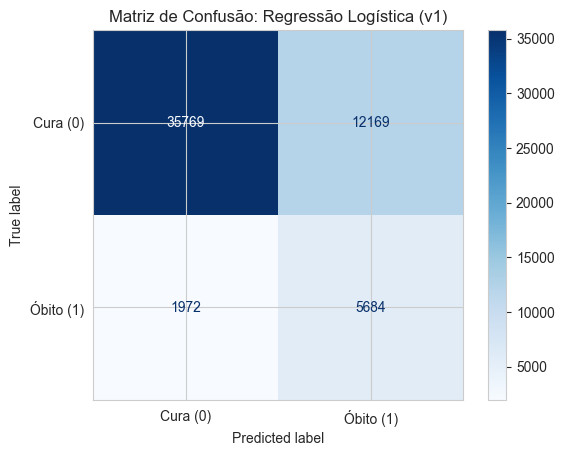


--- Interpretação da Matriz de Confusão ---
Verdadeiros Positivos (Óbito predito correto): 5684 de 7656 casos de Óbito reais
Falsos Negativos (Óbito 'perdido'):           1972 de 7656 casos de Óbito reais
Verdadeiros Negativos (Cura predita correta): 35769 de 47938 casos de Cura reais
Falsos Positivos (Cura predita 'errada'):     12169 de 47938 casos de Cura reais


In [13]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cura (0)', 'Óbito (1)'])

plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusão: Regressão Logística (v1)')
plt.show()

tn, fp, fn, tp = cm.ravel()
total_obito = tp + fn
total_cura = tn + fp

print("\n--- Interpretação da Matriz de Confusão ---")
print(f"Verdadeiros Positivos (Óbito predito correto): {tp} de {total_obito} casos de Óbito reais")
print(f"Falsos Negativos (Óbito 'perdido'):           {fn} de {total_obito} casos de Óbito reais")
print(f"Verdadeiros Negativos (Cura predita correta): {tn} de {total_cura} casos de Cura reais")
print(f"Falsos Positivos (Cura predita 'errada'):     {fp} de {total_cura} casos de Cura reais")

### 12.3. Interpretação das Métricas e Resultados do Pipeline

O modelo de Regressão Logística demonstrou ser eficaz na triagem, priorizando a segurança do paciente, mas com margem para melhorias na precisão:

**Bom Poder de Discriminação:** O modelo obteve um AUC-ROC de ~0.79, indicando que ele consegue distinguir bem entre pacientes que irão a óbito e os que se curarão.

**Alta Sensibilidade (Recall):** O modelo acertou 72% dos óbitos reais. Isso é um ponto positivo para a saúde, pois significa que ele detecta a maioria dos casos graves.

**Baixa Precisão (Muitos Alarmes Falsos):** Devido ao desbalanceamento dos dados (muito mais curas que óbitos), o modelo gera muitos falsos positivos. A precisão para óbito foi de apenas 31%, ou seja, de cada 10 alertas de óbito, apenas 3 eram reais.

**Conclusão:** O modelo é "alarmista", o que é preferível a deixar passar um óbito despercebido, mas precisa de ajustes (como mudança no limiar de decisão) para reduzir o número de falsos alertas.



###13. Pipeline de Modelagem com ajuste do limiar de decisão para '0.60' (V2)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# 1. Obter as probabilidades em vez das classes diretas (0 ou 1)
# O modelo retorna duas colunas: [prob_cura, prob_obito]. Pegamos a coluna 1.
y_proba = pipeline_v1.predict_proba(X_test)[:, 1]

# 2. Definir o novo limiar (Threshold)
# Tente valores entre 0.60 e 0.70. Vamos começar com 0.65 conforme sugerido.
novo_limiar = 0.60

# 3. Aplicar o filtro manual
# Se a probabilidade for maior que 0.65, é Óbito (1). Senão, é Cura (0).
y_pred_ajustado = (y_proba >= novo_limiar).astype(int)

# 4. Avaliar os novos resultados
print(f"--- Resultados com Novo Limiar: {novo_limiar} ---\n")

# Calcular novo F1-Score
novo_f1 = f1_score(y_test, y_pred_ajustado)
print(f"Novo F1-Score (Óbito): {novo_f1:.4f} (Anterior: 0.4348)")

print("\nNova Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_ajustado))

print("\nRelatório de Classificação Ajustado:")
print(classification_report(y_test, y_pred_ajustado))

# 5. Plotar a Matriz de Confusão Visualmente
cm = confusion_matrix(y_test, y_pred_ajustado)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cura (0)', 'Óbito (1)'])

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Matriz de Confusão Limiar {novo_limiar} (V2)')
plt.grid(False) # Remove as linhas de grade para ficar mais limpo
plt.show()

# (Opcional) Imprimir os valores puros da matriz
tn, fp, fn, tp = cm.ravel()
print(f"\nDetalhes da Matriz:")
print(f"Óbitos Detectados (TP): {tp}")
print(f"Alarmes Falsos (FP): {fp}")
print(f"Óbitos Perdidos (FN): {fn}")

--- Resultados com Novo Limiar: 0.6 ---

Novo F1-Score (Óbito): 0.4687 (Anterior: 0.4348)

Nova Matriz de Confusão:
[[39592  8346]
 [ 2758  4898]]

Relatório de Classificação Ajustado:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     47938
           1       0.37      0.64      0.47      7656

    accuracy                           0.80     55594
   macro avg       0.65      0.73      0.67     55594
weighted avg       0.86      0.80      0.82     55594



NameError: name 'y_pred_060' is not defined

###14  MODELO V1 vs MODELO V2 (Comparação)

O modelo ajustado com limiar de 0.60(V2) superou o primeiro modelo (0.50) ao encontrar um ponto de equilíbrio mais eficiente. Enquanto o modelo original priorizava detectar o máximo de óbitos possível (Recall 72%) ao custo de gerar milhares de alarmes falsos, o modelo 0.60 conseguiu limpar esse ruído, reduzindo os falsos positivos em 583 casos.

Embora o modelo 0.60 tenha deixado de detectar cerca de 11% a mais de óbitos em comparação ao original, ele compensou isso com uma maior precisão (35% vs 31%) e uma maior acurácia geral (78% vs 73%). Isso torna o modelo 0.60 uma ferramenta clinicamente mais confiável e menos propensa a causar fadiga de alertas na equipe médica.
